In [18]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Scipy - For accurate integration
from scipy.integrate import simps
from scipy.integrate import trapz

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
fig_size =  [7.3,4.2]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'times-new-roman',
        'font.sans-serif': 'Times New Roman',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [19]:
##########################################################################################
# Energy of incident (input) particles
InputEnergies = np.array([np.linspace(10,90, num=9, endpoint=True, dtype = int),
                          np.linspace(100,900, num=9, endpoint=True, dtype = int),
                          np.linspace(1000,9000, num=9, endpoint=True, dtype = int),
                          np.linspace(11000,19000, num=9, endpoint=True, dtype = int),
                          np.linspace(10000,90000, num=9, endpoint=True, dtype = int),
                            ]).flatten()
# InputEnergies = np.insert(InputEnergies, [len(InputEnergies+1)], [1000000])
DataFolder = '../G4AdEPTCubeSat_Results/Helium3/Neutrons_Trial/'

# print InputEnergies[19]
InputEnergies = np.delete(InputEnergies,36)
InputEnergies = np.insert(InputEnergies, [27], [10000])

##########################################################################################
# Energy thresholds (in eV) for events that will be included in the analysis
Thr_Gas = 100.
print InputEnergies

[   10    20    30    40    50    60    70    80    90   100   200   300
   400   500   600   700   800   900  1000  2000  3000  4000  5000  6000
  7000  8000  9000 10000 11000 12000 13000 14000 15000 16000 17000 18000
 19000 20000 30000 40000 50000 60000 70000 80000 90000]


In [24]:
##########################################################################################
# Load the simulation data for each input energy
Data = []
for InputEnergy in InputEnergies:
    # Create data file template from current energy
    if InputEnergy <= 900:
        DataFilename = 'neutron_He3_' + str(InputEnergy) + 'keV_Nr_10000000_ISO_nt_G4AdEPTCubeSat_t*.csv'
    else:
        DataFilename = 'neutron_He3_' + str(InputEnergy) + 'keV_Nr_100000000_ISO_nt_G4AdEPTCubeSat_t*.csv'
        
    # Statistics variables for each input energy data
    nPos = 0
    nElec = 0
    nSubPos = 0
    nSubElec = 0
    nTotal = 0
    nSubThr = 0
    nCompton = 0
    nPair = 0
    nPhoto = 0
    nCapture = 0
    
    # Print energy 
    print '\n------------------------------------------------------------'
    print 'Energy: \t\t', str(InputEnergy), 'keV'

    ##########################################################################################
    # Process the simulation data files
    # Column 0 - Total energy deposited in the sensitive gas volume [eV]
    # Column 1 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 2 - Energy deposited by positrons in the sensitive gas volume [eV]
    # Column 3 - Energy deposited by tritons in the sensitive gas volume [eV]
    # Column 4 - Energy deposited by protons in the sensitive gas volume [eV]
    # Column 5 - Track length of particles in the sensitive gas volume [mm]
    # Column 6 - Number of secondary electrons generated in the sensitive gas volume
    # Column 7 - Number of secondary photons generated in the sensitive gas volume
    # Column 8 - Number of secondary positrons generated in the sensitive gas volume
    # Column 9 - Number of secondary tritons generated in the sensitive gas volume
    # Column 10 - Number of secondary protons generated in the sensitive gas volume
    
    for dataFile in glob.glob(DataFolder + DataFilename):
        # Readout CSV files
        try:
            dataFrame = pandas.read_csv(dataFile, usecols=[0,1,2,3,4,5,6,7,8,9,10], comment="#", error_bad_lines=False, skip_blank_lines=True).values

            # Determine the interaction type
            for i in range(1,len(dataFrame)):
                if dataFrame[i,0] > Thr_Gas:
                    if dataFrame[i,10] > 0 and dataFrame[i,9] > 0:
                        nCapture += 1
#                     if dataFrame[i,7] > 0 and dataFrame[i,5] > 0:
#                         nPair += 1
#                     else:
#                         if dataFrame[i,6] > 0. and dataFrame[i,5] > 0.:
#                             nCompton += 1
#                         else:
#                             nPhoto += 1

            # Increment statistics
            nPos += dataFrame[(dataFrame[:,1] > Thr_Gas),0].size
            nElec += dataFrame[(dataFrame[:,2] > Thr_Gas),0].size
            nSubPos += dataFrame[(dataFrame[:,1] <= Thr_Gas),0].size
            nSubElec += dataFrame[(dataFrame[:,2] <= Thr_Gas),0].size
            nTotal += dataFrame[(dataFrame[:,0] > Thr_Gas),0].size
            nSubThr += dataFrame[(dataFrame[:,0] <= Thr_Gas),0].size
        except:
            pass
        
    # Add statistics to data list (Convert to numpy array later)
    Data.append([InputEnergy,nPos,nElec,nSubPos,nSubElec,nTotal,nSubThr,nCompton,nPair,nPhoto,nCapture])
        
    # Print statistics
    print '------------------------------------------------------------'
    print 'Number of events above threshold: \t', nTotal
    print 'Number of events below threshold: \t', nSubThr
    print 'Number of neutron capture events: \t', nCapture
    print '------------------------------------------------------------'
    
# Convert statistics list to Numpy array
Data = np.asarray(Data)


------------------------------------------------------------
Energy: 		10 keV
------------------------------------------------------------
Number of events above threshold: 	5884
Number of events below threshold: 	9
Number of neutron capture events: 	5263
------------------------------------------------------------

------------------------------------------------------------
Energy: 		20 keV
------------------------------------------------------------
Number of events above threshold: 	3843
Number of events below threshold: 	5
Number of neutron capture events: 	3418
------------------------------------------------------------

------------------------------------------------------------
Energy: 		30 keV
------------------------------------------------------------
Number of events above threshold: 	3134
Number of events below threshold: 	2
Number of neutron capture events: 	2784
------------------------------------------------------------

---------------------------------------------

In [25]:
##########################################################################################
# Calculate the geometry factor (G) assuming an isotropic radiation environment.
# The detector is centered on, and encircled by, a spherical source of radius (R) and
# with N_R simulated particles distributed uniformly along the inner surface.

# Source information (Get this from the Geant4 simulation!!)
N_R = 10000000.
N_R_2 = 100000000.
R = 10.

# Calculate the geometry factors
G_Total_1 = Data[:18,5]/N_R*4*(np.pi**2)*(R**2)
G_Capture_1 = Data[:18,10]/N_R*4*(np.pi**2)*(R**2)

G_Total_2 = Data[18:,5]/N_R_2*4*(np.pi**2)*(R**2)
G_Capture_2 = Data[18:,10]/N_R_2*4*(np.pi**2)*(R**2)

G_Total = np.array([])
G_Total = np.append(G_Total_1,G_Total_2)

G_Capture = np.array([])
G_Capture = np.append(G_Capture_1,G_Capture_2)

# Calculate the errors for geometry factors 
err_G_Total_1 = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:18,5]/N_R)*Data[:18,5]/N_R**2)
err_G_Capture_1 = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[:18,10]/N_R)*Data[:18,10]/N_R**2)

err_G_Total_2 = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[18:,5]/N_R_2)*Data[18:,5]/N_R_2**2)
err_G_Capture_2 = 4*(np.pi**2)*(R**2)*np.sqrt((1-Data[18:,10]/N_R_2)*Data[18:,10]/N_R_2**2)

err_G_Total = np.array([])
err_G_Total = np.append(err_G_Total_1,err_G_Total_2)

err_G_Capture = np.array([])
err_G_Capture = np.append(err_G_Capture_1,err_G_Capture_2)

# Calculate relative errors for the geometry factors
relErr_G_Total = err_G_Total/G_Total
relErr_G_Capture = err_G_Capture/G_Capture

Plot saved to: ../G4AdEPTCubeSat_Results/Helium3/Neutrons_Trial/Geometric_Factor_Neutron_Helium3.pdf


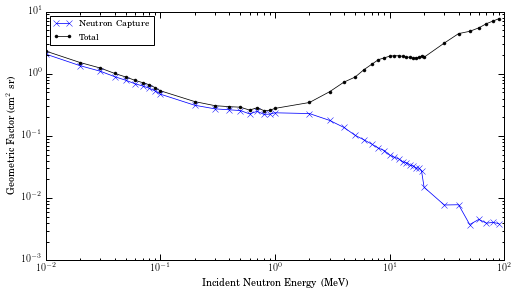

In [26]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

plt.loglog(Data[:,0]/1000., G_Capture, 'bx-', linewidth=0.75, label="Neutron Capture")
plt.loglog(Data[:,0]/1000., G_Total, 'k.-', linewidth=0.75, label="Total")

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Neutron Energy (MeV)') 
# axG.set_ylim(0.01, 2000.)
# axG.set_xlim(0.09, 8)

axG.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figG = 'Geometric_Factor_Neutron_Helium3.pdf'
plt.savefig(DataFolder + file_figG, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figG)

# Show the figure
plt.show(figG)

Plot saved to: ../G4AdEPTCubeSat_Results/Helium3/Neutrons_Trial/Geometric_Factor_Error_Neutron_Helium3.pdf


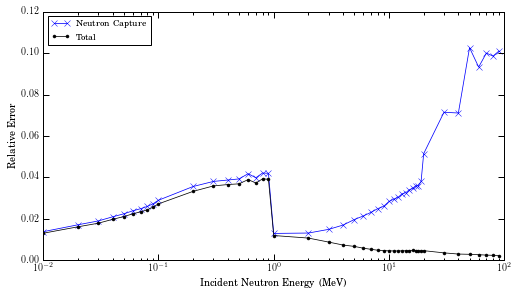

[  1.37806277   1.71017179   1.89498127   2.09541011   2.23976817
   2.38684011   2.48816207   2.59655316   2.72652604   2.8962496
   3.55995382   3.80404785   3.87188633   3.92521598   4.17744024
   3.98081154   4.21064086   4.19578763   1.29408707   1.31279991
   1.49001633   1.69805958   1.96340269   2.13928938   2.31432202
   2.49143024   2.60375902   2.83636251   2.94754089   3.03586723
   3.20583722   3.2598915    3.40205439   3.46270237   3.58977686
   3.60139815   3.8069218    5.14343528   7.14285014   7.10668351
  10.25977865   9.32504272   9.999995     9.85328771  10.1015205 ]


In [27]:
##########################################################################################
# Plot the error in the Geometry Factor over a range of particle energies
figE, axE = plt.subplots(1,1)

plt.semilogx(Data[:,0]/1000., relErr_G_Capture, 'bx-', linewidth=0.75, label="Neutron Capture")
plt.semilogx(Data[:,0]/1000., relErr_G_Total, 'k.-', linewidth=0.75, label="Total")

# Figure Properties
axE.set_ylabel(r'Relative Error')  
axE.set_xlabel('Incident Neutron Energy (MeV)') 
# axE.set_ylim(0., 0.05)
# axE.set_xlim(0.1, 1001)

axE.legend(loc='upper left')

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figE = 'Geometric_Factor_Error_Neutron_Helium3.pdf'
plt.savefig(DataFolder + file_figE, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figE)

# Show the figure
plt.show(figE)

print relErr_G_Capture*100.

Plot saved to: ../G4AdEPTCubeSat_Results/Helium3/Neutrons_He3/Neutron_Flux.pdf


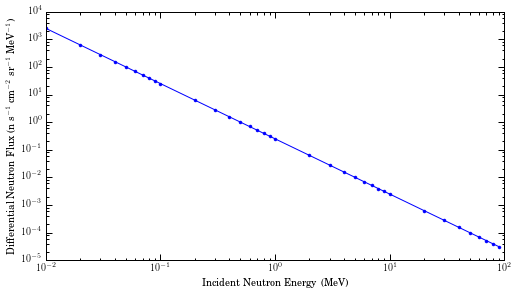

In [7]:
##########################################################################################
# Calculate the differential Neutron flux spectrum
Energies_MeV = InputEnergies/1000.
ETFlux = 0.25*(Energies_MeV**(-2))

figF, axF = plt.subplots(1,1)

plt.loglog(Energies_MeV,ETFlux, 'b.-')

# Figure Properties
axF.set_ylabel(r'Differential Neutron Flux (n s$^{-1}$ cm$^{-2}$ sr$^{-1}$ MeV$^{-1}$)')  
axF.set_xlabel('Incident Neutron Energy (MeV)') 
# axF.set_ylim(10**-4, 10**3)
# axF.set_xlim(1, 1000)

# Tight Layout
plt.tight_layout()

# Save the figure 
file_figF = 'Neutron_Flux.pdf'
plt.savefig(DataFolder + file_figF, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figF)

# Show the figure
plt.show(figF)

Plot saved to: ../G4AdEPTCubeSat_Results/Helium3/Neutrons_He3/Neutron_Differential_Count_Rates.pdf


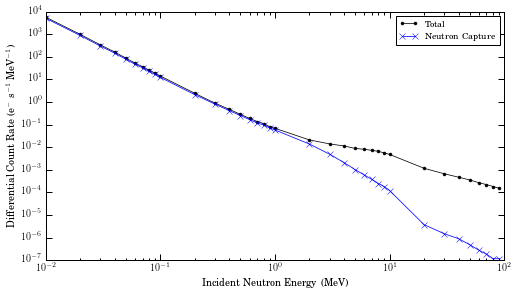

In [22]:
diffCountRate = G_Total*ETFlux
diffCountRate_Capture = G_Capture*ETFlux
figD, axD = plt.subplots(1,1)

plt.loglog(InputEnergies/1000.,diffCountRate,'kx-',linewidth=0.75,label='Total')
plt.loglog(InputEnergies/1000.,diffCountRate_Capture,'b.-',linewidth=0.75,label='Neutron Capture')

axD.set_ylabel(r'Differential Count Rate (e$^{-}$ s$^{-1}$ MeV$^{-1}$)')
axD.set_xlabel('Incident Neutron Energy (MeV)')

plt.tight_layout()

axD.legend(loc='upper right')

file_figD = 'Neutron_Differential_Count_Rates.pdf'
plt.savefig(DataFolder + file_figD, bbox_inches="tight")
print 'Plot saved to: ' + (DataFolder+file_figD)

plt.show(figD)

Expected  90492.488341  capture events per orbit. (Avg Energy)
Expected  225900.109247  capture events per orbit. (Simps)


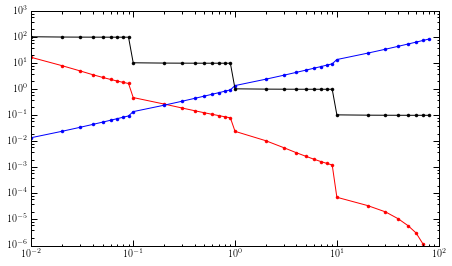

In [23]:
# Integral count Rates
##########################################################################################
# Average Energy Method
def effEnergy(Energy1,Energy2):
    effEnergy1 = np.log(Energy2/Energy1)/(1./Energy1-1./Energy2)
    effEnergy2 = 1./((effEnergy1**2)*(1./Energy1-1./Energy2))
    return effEnergy1,effEnergy2    # effEnergy1 = 1./(<E>^2 * (1/E1 - 1/E2)

inEnergy1 = 1.*Energies_MeV[0:len(Energies_MeV)-1]
inEnergy2 = 1.*Energies_MeV[1:len(Energies_MeV)]

[effecEnergy1,effecEnergy2] = effEnergy(inEnergy1,inEnergy2)    # <E>

diffCountRate_1 = diffCountRate_Capture[0:len(Energies_MeV)-1]/effecEnergy2

revDiffCountRate_1 = diffCountRate_1[::-1]

intCountRate_Avg = np.array([])

counts = 0
for i in range(0,len(diffCountRate_1)):
    counts = sum(revDiffCountRate_1[0:i])
    intCountRate_Avg = np.append(intCountRate_Avg, counts)
    
intCountRate_Avg = intCountRate_Avg[::-1]

##########################################################################################
# Simpson's method
intCountRate_Simp = np.array([])

Counts = 0
for i in range(0,len(InputEnergies)-1):    # Modified Simpson's rule with variable energy spacing
    dE = Energies_MeV[i+1]-Energies_MeV[i]
    Counts = trapz(diffCountRate_Capture[i:i+2], Energies_MeV[i:i+2])#dx=dE)## # Using dE or Energies_MeV gives the same answer
    intCountRate_Simp = np.append(intCountRate_Simp,Counts)

intCountRate_Simp = sum(intCountRate_Simp)

plt.loglog(Energies_MeV[:len(Energies_MeV)-1], intCountRate_Avg, 'r.-')
plt.loglog(Energies_MeV[:len(Energies_MeV)-1], effecEnergy1, 'b.-')
plt.loglog(Energies_MeV[:len(Energies_MeV)-1], effecEnergy2, 'k.-')

print "Expected ", max(intCountRate_Avg)*60*90, " capture events per orbit. (Avg Energy)"
print "Expected ", intCountRate_Simp*60*90, " capture events per orbit. (Simps)"